1074. Number of Submatrices That Sum to Target

Given a matrix and a target, return the number of non-empty submatrices that sum to target.

A submatrix x1, y1, x2, y2 is the set of all cells matrix[x][y] with x1 <= x <= x2 and y1 <= y <= y2.

Two submatrices (x1, y1, x2, y2) and (x1', y1', x2', y2') are different if they have some coordinate that is different: for example, if x1 != x1'.

 

Example 1:


Input: matrix = [[0,1,0],[1,1,1],[0,1,0]], target = 0
Output: 4
Explanation: The four 1x1 submatrices that only contain 0.
Example 2:

Input: matrix = [[1,-1],[-1,1]], target = 0
Output: 5
Explanation: The two 1x2 submatrices, plus the two 2x1 submatrices, plus the 2x2 submatrix.
Example 3:

Input: matrix = [[904]], target = 0
Output: 0

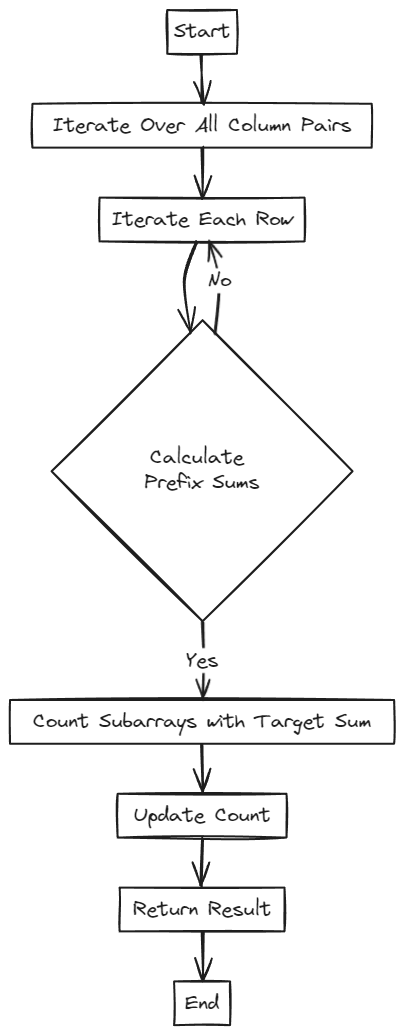

In [1]:
class Solution(object):
    def numSubmatrixSumTarget(self, matrix, target):
        """
        :type matrix: List[List[int]]
        :type target: int
        :rtype: int
        """
        rows, cols = len(matrix), len(matrix[0])
        count = 0

        for row in matrix:
            for col in range(1, cols):
                row[col] += row[col - 1]

        for col1 in range(cols):
            for col2 in range(col1, cols):
                sums = {0: 1}
                csum = 0

                for row in range(rows):
                    csum += matrix[row][col2] - (matrix[row][col1 - 1] if col1 > 0 else 0)
                    count += sums.get(csum - target, 0)
                    sums[csum] = sums.get(csum, 0) + 1

        return count